In [ ]:
 <h1 align=center><font size="5"> IDS Project (Group Members: Hammad Ahmad & Haseeb Ullah) </font></h1>
 <h1 align=center><font size="3"> Bank Loan Prediction System using Logistic Regression </font></h1>
In this notebook we used logistic regression for predicting the Loan Status. the logistic model is used to model the probability of a certain class or event existing such as pass/fail, win/lose, alive/dead or healthy/sick. This can be extended to model several classes of events such as determining whether an image contains a cat, dog, lion, etc
 This Notebook involves simple data science techniques and goaes through data gathering, data cleaning, identification of features and prediction and obviously implementing a dataset on logistic regression and predicting Status Of Loan.(Fully Paid/Charged off)

 <h1>Table of contents</h1>

 <div class="alert alert-block alert-info" style="margin-top: 20px">
     <ol>
         <li><a href="#load_dataset">Load the Loan Prediction Dataset</a></li>
         <li><a href="#Dataset Specification">Dataset Specification</a></li>
         <li><a href="#Identification Of Missing and Non Missing Values">Identification Of Missing and Non Missing Values</a></li>
         <li><a href="#Removing Numerical Missing Data">Removing Numerical Missing Data</a></li>
         <li><a href="#Visualizing Relationship between Features">Visualizing Relationship between Features</a></li>
         <li><a href="#User Input for Model Prediction">User Input for Model Prediction</a></li>
         <li><a href="#Handling Categorical Features in Dataset">Handling Categorical Features in Dataset</a></li>
         <li><a href="#Model Training">Model Training</a></li>
         <li><a href="#Prediction and Exaluation">Prediction and Exaluation</a></li>
     </ol>
 </div>
 <br>
 <hr>

 <h2 id="load_dataset">Load the Loan Prediction Dataset</h2>
 dataset is available at kaggle.
 https://kaggle.com/zaurbegiev/my-dataset?utm_medium=social&utm_campaign=kaggle-dataset-share&utm_source=twitter

In [6]:
import pandas as pd
dataset = pd.read_csv("credit_train.csv")
df=pd.DataFrame(dataset)
df['Loan ID'][0]

'14dd8831-6af5-400b-83ec-68e61888a048'

In [2]:
print("Number of Rows:",dataset.shape[0])
print("Number of Columns: ",dataset.shape[1])

Number of Rows: 100514
Number of Columns:  19


In [ ]:
 <h2 id="Dataset Specification">Dataset Specification</h2>
 Involves different Functions whichh let us know the Complexity, size and different attributes of a Dataset

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

In [4]:
dataset.tail()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
100509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
 <h2 id="Identification Of Missing and Non Missing Values">Identification Of Missing and Non Missing Values</h2>
 Simple Code which tell the number of missing and non missing values in columns of the dataset. Missing values will than be removed step b step to feed to the classifier

In [5]:
temp_dataset = dataset.isnull().sum().reset_index()
temp_dataset['Percentage'] = (temp_dataset[0]/len(dataset))*100
temp_dataset.columns = ['Column Name', 'Number of null values', 'null percentage']
temp_dataset

,Column Name,Number of null values,null percentage
0,Loan ID,514,0.511372
1,Customer ID,514,0.511372
2,Loan Status,514,0.511372
3,Current Loan Amount,514,0.511372
4,Term,514,0.511372
5,Credit Score,19668,19.567423
6,Annual Income,19668,19.567423
7,Years in current job,4736,4.711781
8,Home Ownership,514,0.511372
9,Purpose,514,0.511372


In [6]:
temp1_dataset = dataset.notnull().sum().reset_index()
temp1_dataset['Percentage'] = (temp1_dataset[0]/len(dataset))*100
temp1_dataset.columns = ['Column Name', 'Number of not Null values', 'not null percentage']
temp1_dataset

,Column Name,Number of not Null values,not null percentage
0,Loan ID,100000,99.488628
1,Customer ID,100000,99.488628
2,Loan Status,100000,99.488628
3,Current Loan Amount,100000,99.488628
4,Term,100000,99.488628
5,Credit Score,80846,80.432577
6,Annual Income,80846,80.432577
7,Years in current job,95778,95.288219
8,Home Ownership,100000,99.488628
9,Purpose,100000,99.488628


In [ ]:
 <h2 id="Removing Numerical Missing Data">Removing Numerical Missing Data</h2>
 In this section we removed 'Months since last delinquet' feature as it has more 50% of missing values. Also 'Loan ID' and 'Customer ID' are not of use. so we are removing them also. whereas, observing 'Current Loan Amount' we found that 514 enteries have NAN values so we removed them.

In [7]:
# Months since last delinquent have more than 50% NaN values
# We don't need Loan-Id and Customer_id as they are for identification purpose
try:
    dataset.drop(labels=['Months since last delinquent'],axis=1,inplace=True)
    dataset.drop(labels=['Loan ID', 'Customer ID'],axis=1,inplace=True)
except Exception as e:
    pass
dataset.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
1,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0
2,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0


In [8]:
dataset[dataset['Current Loan Amount'].isnull()==True]

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#dropping these last 514 rows
dataset.drop(dataset[dataset['Current Loan Amount'].isnull()==True].index,inplace=True)
dataset.tail()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
99995,Fully Paid,147070.0,Short Term,725.0,475437.0,7 years,Own Home,other,2202.86,22.3,5.0,0.0,47766.0,658548.0,0.0,0.0
99996,Fully Paid,99999999.0,Short Term,732.0,1289416.0,1 year,Rent,Debt Consolidation,13109.05,9.4,22.0,0.0,153045.0,509234.0,0.0,0.0
99997,Fully Paid,103136.0,Short Term,742.0,1150545.0,6 years,Rent,Debt Consolidation,7315.57,18.8,12.0,1.0,109554.0,537548.0,1.0,0.0
99998,Fully Paid,530332.0,Short Term,746.0,1717524.0,9 years,Rent,Debt Consolidation,9890.07,15.0,8.0,0.0,404225.0,738254.0,0.0,0.0
99999,Fully Paid,99999999.0,Short Term,743.0,935180.0,NaN,Own Home,Debt Consolidation,9118.10,13.0,4.0,1.0,45600.0,91014.0,1.0,0.0


In [ ]:
 Missing values of 'Credit Score' and 'Annual Income' are replaced by their respective mean.

In [10]:
# same is the case with credit score and anual income trying to replace missing values with mean
dataset['Credit Score'].fillna(value=dataset['Credit Score'].mean(),inplace=True)
dataset['Annual Income'].fillna(value=dataset['Annual Income'].mean(),inplace=True)
dataset.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,445412.0,Short Term,709.000000,1.167493e+06,8 years,Home Mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
1,Fully Paid,262328.0,Short Term,1076.456089,1.378277e+06,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0
2,Fully Paid,99999999.0,Short Term,741.000000,2.231892e+06,8 years,Own Home,Debt Consolidation,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,Fully Paid,347666.0,Long Term,721.000000,8.069490e+05,3 years,Own Home,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,Fully Paid,176220.0,Short Term,1076.456089,1.378277e+06,5 years,Rent,Debt Consolidation,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0


In [11]:
dataset['Years in current job'].fillna(value='10+ years',inplace=True)
# also dealing with bankruptcies so that we will have minimum missing values
dataset['Bankruptcies'].fillna(value=dataset['Bankruptcies'].mean(),inplace=True)

 <h2 id="Visualizing Relationship between Features">Visualizing Relationship between Features</h2>
 Different Graphs showing the relationship between the features of the dataset.

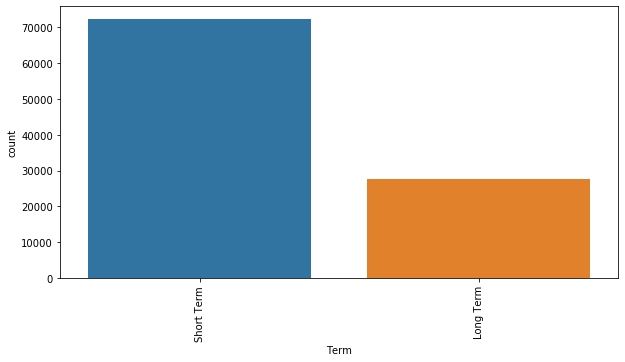

In [12]:
# Cleaning Categorical data
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,5))
sns.countplot(data=dataset,x="Term")
plt.xticks(rotation=90)
plt.show()

In [13]:
#As max people apply for short term so replacing missing with 'short term'
dataset['Term'].fillna(value='Short Term',inplace=True)

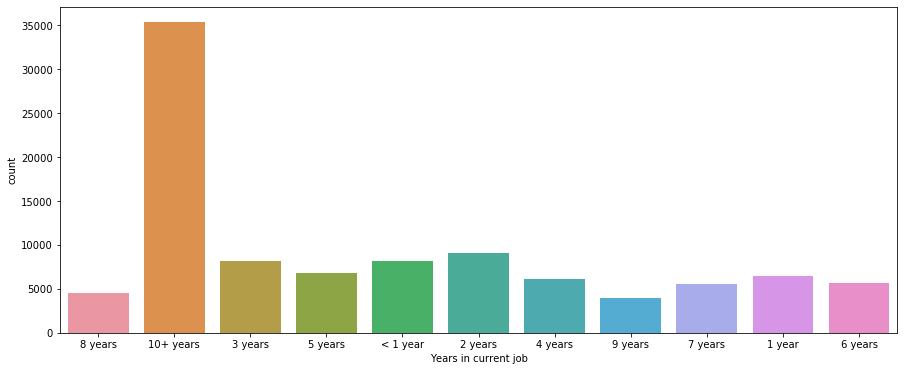

In [14]:
plt.figure(figsize=(15,6))
sns.countplot(data=dataset,x='Years in current job')
plt.show()

In [15]:
for i in dataset['Tax Liens'][dataset['Tax Liens'].isnull() == True].index:
    dataset.drop(labels=i, inplace=True)
for i in dataset['Maximum Open Credit'][dataset['Maximum Open Credit'].isnull() == True].index:
    dataset.drop(labels=i, inplace=True)

In [16]:
temp_dataset = dataset.isnull().sum().reset_index()
temp_dataset['Percentage'] = (temp_dataset[0]/len(dataset))*100
temp_dataset.columns = ['Column Name', 'Number of null values', 'null percentage']
temp_dataset

,Column Name,Number of null values,null percentage
0,Loan Status,0,0.0
1,Current Loan Amount,0,0.0
2,Term,0,0.0
3,Credit Score,0,0.0
4,Annual Income,0,0.0
5,Years in current job,0,0.0
6,Home Ownership,0,0.0
7,Purpose,0,0.0
8,Monthly Debt,0,0.0
9,Years of Credit History,0,0.0


In [17]:
dataset.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,9.998800e+04,99988.000000,9.998800e+04,99988.000000,99988.000000,99988.000000,99988.000000,9.998800e+04,9.998800e+04,99988.000000,99988.000000
mean,1.176085e+07,1076.418767,1.378285e+06,18473.354105,18.198797,11.128565,0.168310,2.946256e+05,7.580791e+05,0.117743,0.029314
std,3.178439e+07,1326.541813,9.723474e+05,12174.916973,7.015470,5.009919,0.482717,3.761568e+05,8.342374e+06,0.351086,0.258185
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,711.000000,9.311378e+05,10214.685000,13.500000,8.000000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122680e+05,733.000000,1.369634e+06,16221.155000,16.900000,10.000000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,750.000000,1.512704e+06,24012.295000,21.700000,14.000000,0.000000,3.679350e+05,7.828535e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,76.000000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


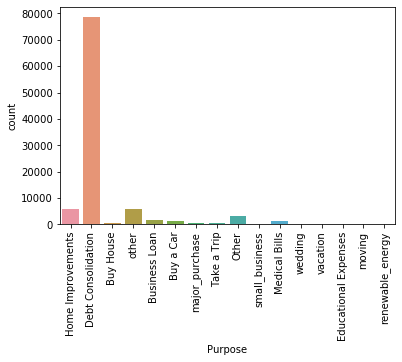

In [18]:
sns.countplot(data=dataset,x='Purpose')
plt.xticks(rotation=90)
plt.show()

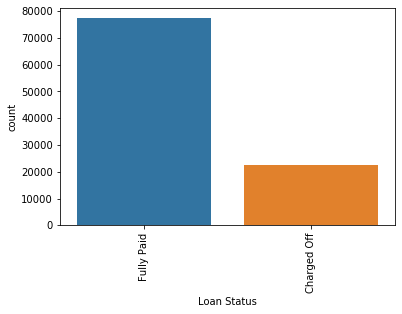

In [19]:
sns.countplot(data=dataset,x='Loan Status')
plt.xticks(rotation=90)
plt.show()

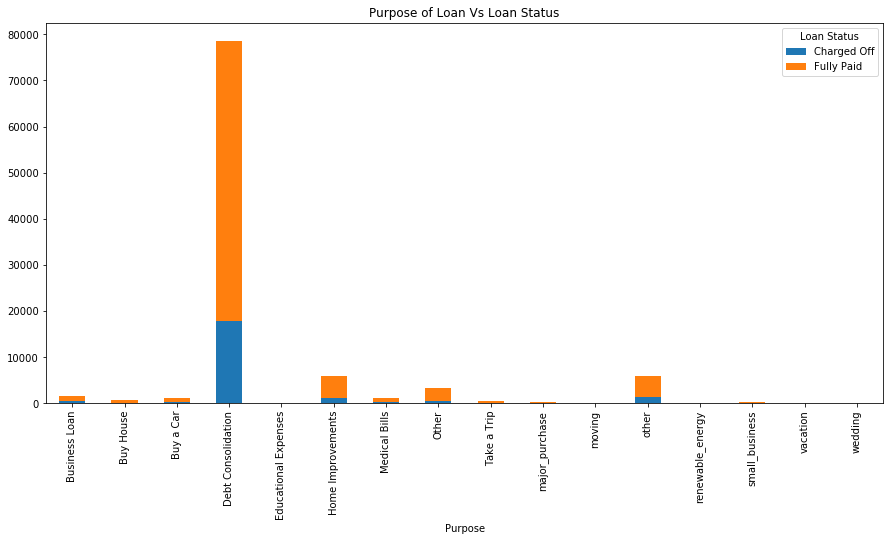

In [20]:
pd.crosstab(dataset['Purpose'],dataset['Loan Status']).plot(kind='bar',stacked=True,figsize=(15,7),title="Purpose of Loan Vs Loan Status")

 <h2 id="#User Input for Model Prediction">User Input for Model Prediction</h2>
 Two types of Inputs one for each category. These inputs will be fed to trained model for prediction purpose.
 Also to deal with the Expension of Columns during Categorical Data Handling we joined these user inputs with the dataset so that they will have same number of columns as of training data.

In [21]:
#Input for fully paid
'''data={
      'Current Loan Amount':[611314],
      'Term':['Short Term'],
      'Credit Score':[747],
      'Annual Income':[2074116],
      'Years in current job':['10+ years'],
      'Home Ownership':['Home Mortgage'],
      'Purpose':['Debt Consolidation'],
      'Monthly Debt':[42000.83],
      'Years of Credit History':[21.8],
      'Number of Open Accounts':[9],
      'Number of Credit Problems':[0],
      'Current Credit Balance':[621908],
      'Maximum Open Credit':[1058970],
      'Bankruptcies':[0],
      'Tax Liens':[0],
}'''
#input for charged off
data={
      'Current Loan Amount':[206602],
      'Term':['Short Term'],
      'Credit Score':[7290],
      'Annual Income':[896857],
      'Years in current job':['10+ years'],
      'Home Ownership':['Home Mortgage'],
      'Purpose':['Debt Consolidation'],
      'Monthly Debt':[16367.74],
      'Years of Credit History':[17.3],
      'Number of Open Accounts':[6],
      'Number of Credit Problems':[0],
      'Current Credit Balance':[215308],
      'Maximum Open Credit':[272448],
      'Bankruptcies':[0],
      'Tax Liens':[0],
}
test_set=pd.DataFrame(data)
dataset['train']=1          #for identification purpose
test_set['train']=0
combined=pd.concat([dataset,test_set])  #Combing user input with dataset
combined.tail()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,train
99996,Fully Paid,99999999.0,Short Term,732.0,1289416.0,1 year,Rent,Debt Consolidation,13109.05,9.4,22.0,0.0,153045.0,509234.0,0.0,0.0,1
99997,Fully Paid,103136.0,Short Term,742.0,1150545.0,6 years,Rent,Debt Consolidation,7315.57,18.8,12.0,1.0,109554.0,537548.0,1.0,0.0,1
99998,Fully Paid,530332.0,Short Term,746.0,1717524.0,9 years,Rent,Debt Consolidation,9890.07,15.0,8.0,0.0,404225.0,738254.0,0.0,0.0,1
99999,Fully Paid,99999999.0,Short Term,743.0,935180.0,10+ years,Own Home,Debt Consolidation,9118.10,13.0,4.0,1.0,45600.0,91014.0,1.0,0.0,1
0,NaN,206602.0,Short Term,7290.0,896857.0,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,6.0,0.0,215308.0,272448.0,0.0,0.0,0


In [22]:
correlations_data = dataset.corr()['Credit Score'].sort_values(ascending=False)
print(correlations_data.tail)

<bound method NDFrame.tail of Credit Score                 1.000000
Number of Open Accounts      0.005830
Tax Liens                    0.004750
Current Credit Balance      -0.000055
Monthly Debt                -0.001588
Maximum Open Credit         -0.002099
Number of Credit Problems   -0.002731
Bankruptcies                -0.006250
Years of Credit History     -0.008755
Annual Income               -0.017104
Current Loan Amount         -0.095146
train                             NaN
Name: Credit Score, dtype: float64>


<h2 id="#Handling Categorical Features in Dataset">Handling Categorical Features in Dataset</h2>
Converting Categorical Data: Term, Years in Job, Home Ownership and Purpose to Numerical Data.

In [23]:
categorical_data = combined[['Term', 'Years in current job', 'Home Ownership', 'Purpose']]
categorical_data=pd.get_dummies(categorical_data)
combined.drop(labels=['Term', 'Years in current job', 'Home Ownership', 'Purpose'],axis=1,inplace=True)
combined=pd.concat([combined,categorical_data],axis=1)
combined.tail()

,Loan Status,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,...,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
99996,Fully Paid,99999999.0,732.0,1289416.0,13109.05,9.4,22.0,0.0,153045.0,509234.0,...,0,0,0,0,0,0,0,0,0,0
99997,Fully Paid,103136.0,742.0,1150545.0,7315.57,18.8,12.0,1.0,109554.0,537548.0,...,0,0,0,0,0,0,0,0,0,0
99998,Fully Paid,530332.0,746.0,1717524.0,9890.07,15.0,8.0,0.0,404225.0,738254.0,...,0,0,0,0,0,0,0,0,0,0
99999,Fully Paid,99999999.0,743.0,935180.0,9118.10,13.0,4.0,1.0,45600.0,91014.0,...,0,0,0,0,0,0,0,0,0,0
0,NaN,206602.0,7290.0,896857.0,16367.74,17.3,6.0,0.0,215308.0,272448.0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.

    Inputs:
        threshold: any features with correlations greater than this value are removed

    Output:
        dataframe that contains only the non-highly-collinear features
    '''
    # Dont want to remove correlations between Energy Star Score
    y = x['Loan Status']
    x = x.drop(columns = ['Loan Status'])

    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)

            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                # print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns = drops)

    # Add the score back in to the data
    x['Loan Status'] = y

    return x



In [25]:
combined.shape

(99989, 46)

In [26]:
combined=remove_collinear_features(combined,0.6)
combined.shape

(99989, 43)

Here We will seprate the user input from combined data frame. Now we have our user input with same nummber of columns
as are in the dataset.

In [27]:
dataset=combined[combined['train']==1]
test_set=combined[combined['train']==0]             #Seprating User Input from Combined dataset
dataset.drop(labels=['train'],axis=1,inplace=True)
test_set.drop(labels=['train','Loan Status'],axis=1,inplace=True)
test_set.isnull().values

array([[False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False]])

In [28]:
from sklearn.model_selection import train_test_split
feature=dataset.drop(columns='Loan Status')
target=pd.DataFrame(dataset['Loan Status'])
X_train,X_test,y_train,y_test=train_test_split(feature,target,test_size=0.2,random_state=50)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
X_test.head()

(79990, 41)
(79990, 1)
(19998, 41)
(19998, 1)


,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Tax Liens,...,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
12938,611666.0,714.000000,1.151514e+06,28212.15,29.1,8.0,0.0,458242.0,539770.0,0.0,...,0,0,0,0,0,0,0,0,0,0
95619,573166.0,638.000000,1.126092e+06,18205.23,13.6,16.0,0.0,554952.0,889988.0,0.0,...,0,0,0,0,0,0,0,0,0,0
23795,314468.0,1076.456089,1.378277e+06,32497.22,29.8,14.0,0.0,236816.0,1030876.0,0.0,...,0,0,0,0,0,0,0,0,0,0
12028,268928.0,1076.456089,1.378277e+06,13209.94,10.0,15.0,0.0,285494.0,352044.0,0.0,...,0,0,0,0,0,0,0,0,0,0
21090,55880.0,743.000000,1.469308e+06,31345.25,24.6,14.0,0.0,1864185.0,3538590.0,0.0,...,0,0,0,0,0,0,0,0,0,0


 <h2 id="#Model Training">Model Training</h2>

In [29]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
test_set=sc.transform(test_set)
print(X_test[1])
print(test_set)

[-0.35067043 -0.3297191  -0.25255999 -0.02220973 -0.65568341  0.97049881
 -0.34729318  0.70725239  0.01459727 -0.11323805  1.6134793  -1.6134793
 -0.2648728  -0.73960518 -0.31580141 -0.29715201 -0.25564495 -0.26994522
 -0.24618706  4.08379089 -0.21831504 -0.20243697 -0.29725166 -0.04504845
  1.03152557 -0.31847531 -0.12614967 -0.08305489 -0.11319759  0.52309149
 -0.03203405 -0.24956802 -0.10595288 -0.18343799 -0.06000723 -0.03876134
 -0.25391996 -0.01060786 -0.05393328 -0.03144201 -0.03337482]
[[-0.36223535  4.71501772 -0.48112487 -0.17316843 -0.12890721 -1.02307595
  -0.34729318 -0.21819762 -0.05595403 -0.11323805 -0.61977863  0.61977863
  -0.2648728   1.35207274 -0.31580141 -0.29715201 -0.25564495 -0.26994522
  -0.24618706 -0.24487052 -0.21831504 -0.20243697 -0.29725166 -0.04504845
   1.03152557 -0.31847531 -0.12614967 -0.08305489 -0.11319759  0.52309149
  -0.03203405 -0.24956802 -0.10595288 -0.18343799 -0.06000723 -0.03876134
  -0.25391996 -0.01060786 -0.05393328 -0.03144201 -0.0333

In [30]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
encode_y_train=LabelEncoder()
y_train=encode_y_train.fit_transform(y_train)
encode_y_test=LabelEncoder()
y_test=encode_y_test.fit_transform(y_test)

In [31]:
print(y_train)
print(y_test)

[0 0 1 ... 1 1 1]
[1 1 1 ... 1 1 1]


In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
logistic=LogisticRegression()
logistic.fit(X_train,y_train)
accuracy = cross_val_score(estimator=logistic, X=X_train, y=y_train, cv=10)
print(f"The accuracy of the Logistic Regressor Model is \t {accuracy.mean()}")
print(f"The deviation in the accuracy is \t {accuracy.std()}")

The accuracy of the Logistic Regressor Model is 	 0.8188523565445681
The deviation in the accuracy is 	 0.002271021643278516


 <h2 id="#Prediction and Exaluation">Prediction and Exaluation</h2>

In [33]:
import numpy as np
y_pred = logistic.predict(X_test)

# Let us convert 1 and 0 into Fully Paid and Charged off respectively
y_pred = list(map(lambda x: 'Fully Paid' if x==1 else 'Charged Off' ,y_pred))
accuracy_score = cross_val_score(estimator=logistic, X=X_test, y=y_test, cv=10)
print(f"The Predictionaccuracy of the Logistic Regressor Model is \t {accuracy_score.mean()}")
print(f"The deviation in the Prediction accuracy is \t {accuracy_score.std()}")
y_pred = np.array(y_pred)
print(y_pred[:10])

The Predictionaccuracy of the Logistic Regressor Model is 	 0.8199322661330666
The deviation in the Prediction accuracy is 	 0.004418660531173378
['Fully Paid' 'Fully Paid' 'Fully Paid' 'Fully Paid' 'Fully Paid'
 'Fully Paid' 'Fully Paid' 'Fully Paid' 'Fully Paid' 'Charged Off']


In [34]:
import numpy as np
test_set_pred = logistic.predict(test_set)
# Let us convert 1 and 0 into Fully Paid and Charged off respectively
test_set_pred = list(map(lambda x: 'Fully Paid' if x==1 'Dog' else if x==2 else if x==3 else 'Charged Off' ,test_set_pred))
test_set_pred = np.array(test_set_pred)
print(test_set_pred)

['Charged Off']
